In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
df = pd.read_csv('housing.csv')
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [5]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
missing_bedrooms = df.total_bedrooms[df.total_bedrooms.isna()].index

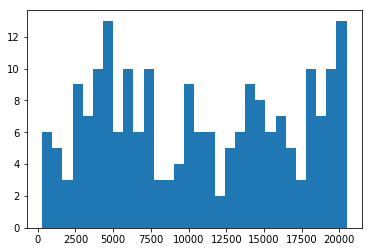

In [7]:
plt.hist(missing_bedrooms, bins=30);

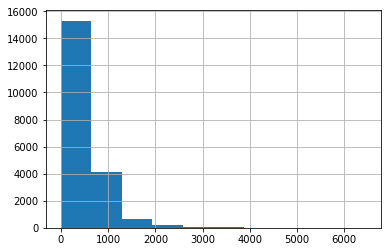

In [8]:
df.total_bedrooms.hist();

In [9]:
mean_bedrooms = df.total_bedrooms.mean()

In [10]:
df['total_bedrooms_fix'] = df.total_bedrooms.fillna(mean_bedrooms)
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedrooms_fix
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,129.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1106.0


In [11]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
total_bedrooms_fix      0
dtype: int64

In [12]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

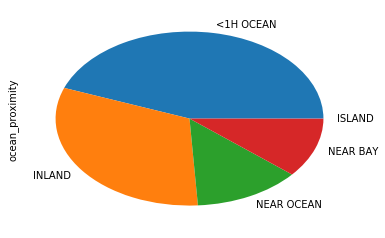

In [13]:
df.ocean_proximity.value_counts().plot(kind = 'pie');

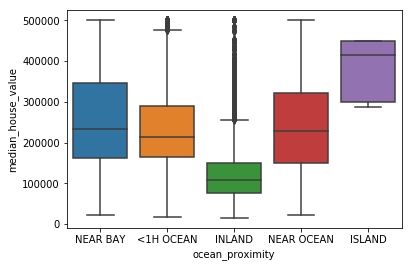

In [14]:
sns.boxplot(data=df,x='ocean_proximity',y='median_house_value');

In [15]:
ocean_columns = pd.get_dummies(df.ocean_proximity).iloc[:,1:]
ocean_columns.head(2)

,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,1,0
1,0,0,1,0


In [16]:
df[ocean_columns.columns] = ocean_columns
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedrooms_fix,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,129.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1106.0,0,0,1,0


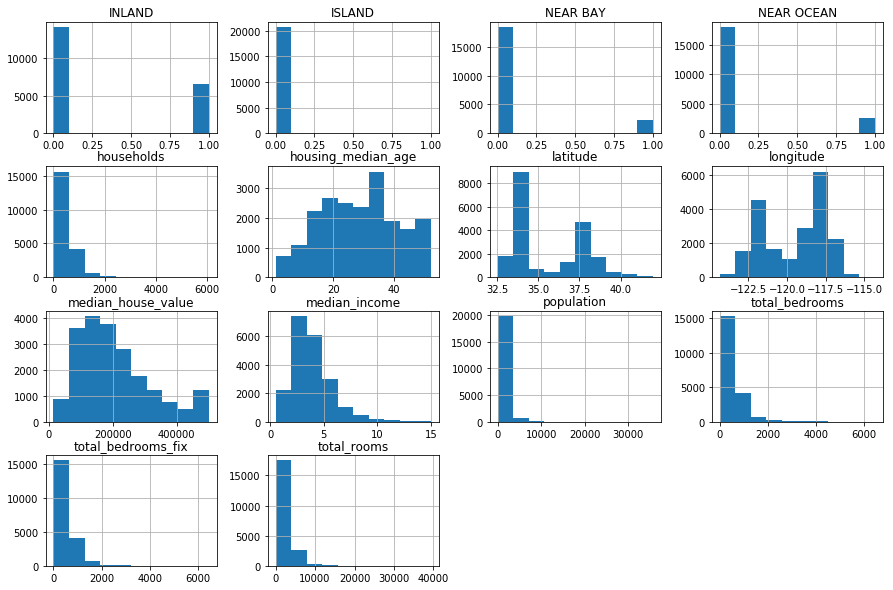

In [17]:
df.hist(figsize=(15,10));

In [18]:
df.corr()['median_house_value'].sort_values()

INLAND               -0.484859
latitude             -0.144160
longitude            -0.045967
population           -0.024650
ISLAND                0.023416
total_bedrooms_fix    0.049454
total_bedrooms        0.049686
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
NEAR OCEAN            0.141862
NEAR BAY              0.160284
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

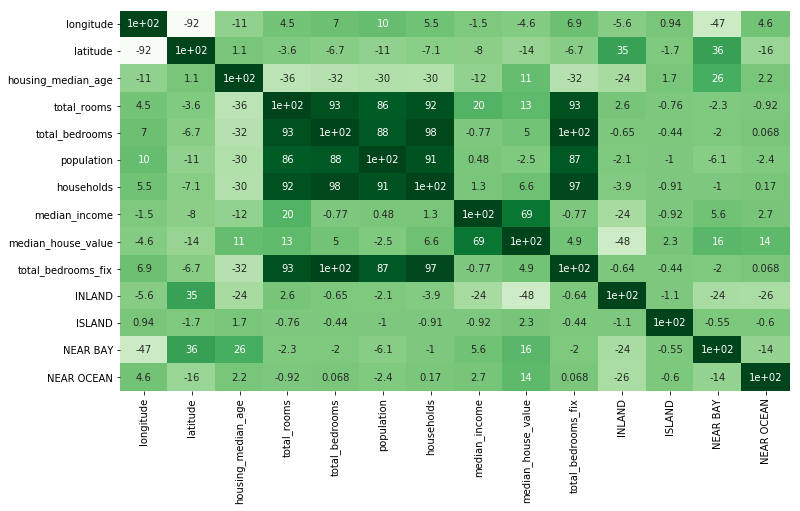

In [19]:
plt.figure(figsize=(12,7))
sns.heatmap(cbar=False,annot=True,data=df.corr()*100,cmap='Greens');

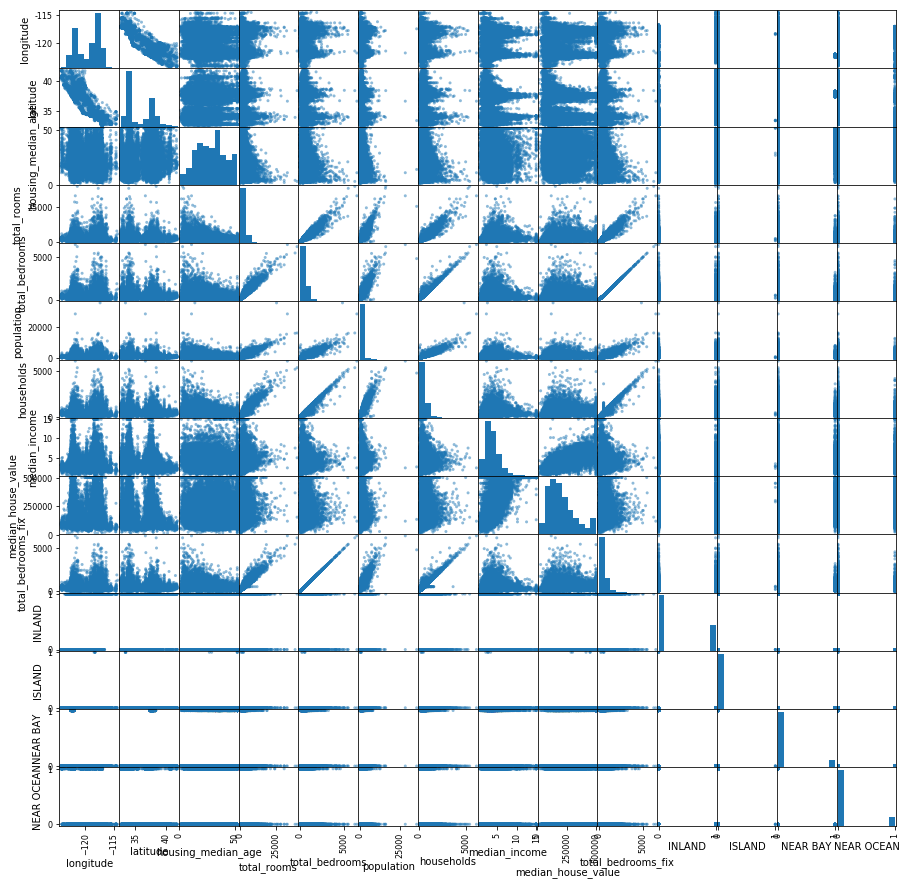

In [20]:
scatter_matrix(df, figsize=(15,15));

/home/chyld/.local/apps/miniconda3/envs/gamma/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


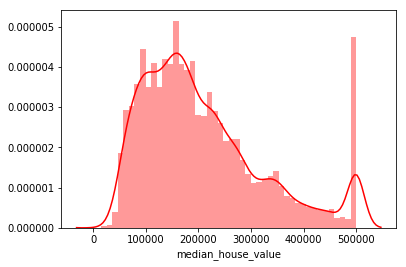

In [21]:
sns.distplot(df['median_house_value'],color='red');

In [22]:
y = df.median_house_value
y.head(2)

0    452600.0
1    358500.0
Name: median_house_value, dtype: float64

In [23]:
list(df.columns)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity',
 'total_bedrooms_fix',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [24]:
X = df.drop(['longitude', 'latitude', 'total_bedrooms', 'median_house_value', 'ocean_proximity', 'households'], axis=1)
X.head(2)

,housing_median_age,total_rooms,population,median_income,total_bedrooms_fix,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,41.0,880.0,322.0,8.3252,129.0,0,0,1,0
1,21.0,7099.0,2401.0,8.3014,1106.0,0,0,1,0


In [25]:
X = sm.add_constant(X)
X.head(2)

,const,housing_median_age,total_rooms,population,median_income,total_bedrooms_fix,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,1.0,41.0,880.0,322.0,8.3252,129.0,0,0,1,0
1,1.0,21.0,7099.0,2401.0,8.3014,1106.0,0,0,1,0


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [27]:
X_train.head(2)

,const,housing_median_age,total_rooms,population,median_income,total_bedrooms_fix,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8158,1.0,37.0,1798.0,860.0,4.2143,331.0,0,0,0,0
18368,1.0,42.0,2533.0,957.0,5.3468,433.0,0,0,0,0


In [28]:
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     2969.
Date:                Sun, 17 Jun 2018   Prob (F-statistic):               0.00
Time:                        02:45:30   Log-Likelihood:            -1.9465e+05
No. Observations:               15480   AIC:                         3.893e+05
Df Residuals:                   15470   BIC:                         3.894e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.443e+04   2832.159      8.625      0.000    1.89e+04       3e+04
housing_median_age  1222.2005     50.988     23.970      0.000    1122.258    1322.143
total_rooms           -7.6233      0.925     -8.238      0.000      -9.437      -5.809
population           -32.0850      1.087    -29.510      0.000     -34.216     -29.954
median_income       4.076e+04    389.638    104.611      0.000       4e+04    4.15e+04
total_bedrooms_fix   140.2663      4.690     29.910      0.000     131.074     149.459
INLAND             -6.971e+04   1439.521    -48.423      0.000   -7.25e+04   -6.69e+04
ISLAND              1.505e+05    3.5e+04      4.299      0.000    8.19e+04    2.19e+05
NEAR BAY            3743.8128   1938.788      1.931      0.054     -56.440    7544.065
NEAR OCEAN          1.302e+04   1809.414      7.197      0.000    9476.005    1.66e+04
==============================================================================
Omnibus:                     3518.853   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12078.151
Skew:                           1.130   Prob(JB):                         0.00
Kurtosis:                       6.690   Cond. No.                     2.43e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
y_hat = results.predict(X_test)

In [30]:
r2_score(y_test, y_hat)

0.6184942186048867

In [31]:
whos

Variable           Type                        Data/Info
--------------------------------------------------------
StandardScaler     type                        <class 'sklearn.preproces<...>ing.data.StandardScaler'>
X                  DataFrame                          const  housing_med<...>[20640 rows x 10 columns]
X_test             DataFrame                          const  housing_med<...>n[5160 rows x 10 columns]
X_train            DataFrame                          const  housing_med<...>[15480 rows x 10 columns]
df                 DataFrame                          longitude  latitud<...>[20640 rows x 15 columns]
mean_bedrooms      float64                     537.8705525375618
missing_bedrooms   Int64Index                  Int64Index([  290,   341,<...>type='int64', length=207)
model              OLS                         <statsmodels.regression.l<...>object at 0x7fcfba754ef0>
np                 module                      <module 'numpy' from '/ho<...>kages/numpy/__init__.py